In [1]:
import nbsetup
import seaborn as sns
import numpy as np
import scipy as sp
from models.sparc.result import Result

In [79]:
GAMMA = 42#8.03408548
ALPHA = 0.3#0.3071966

In [80]:
result = Result()

In [81]:
df = result.datasets()['Quality'].query('rel_R > 0.3 & rel_R < 0.8')

In [82]:
def gprimer(fabs, gamma=GAMMA, alpha=ALPHA):
    return gamma/(1+fabs**alpha)

gprime = gprimer(df['F_scalar'])

<AxesSubplot:xlabel='R', ylabel='F_scalar'>

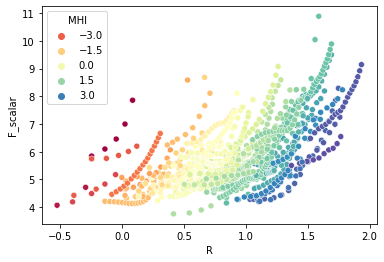

In [83]:
sns.scatterplot(x=np.log10(df['R']), y=gprime, hue=np.log(df['MHI']), palette='Spectral')

<AxesSubplot:xlabel='F_scalar', ylabel='Count'>

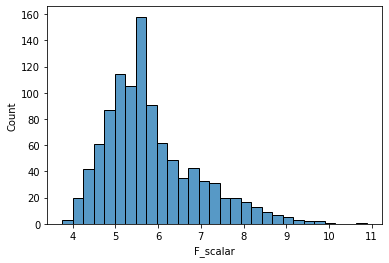

In [84]:
sns.histplot(gprime)

[None]

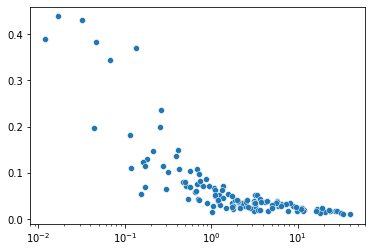

In [78]:
y = []
x = []
for gui, gdf in df.groupby('Galaxy'):
    line = sp.stats.linregress(gdf['R'], gprimer(gdf['Fabs']))
    y.append(line.slope)
    x.append(gdf['MHI'].mean())

sns.scatterplot(x=x, y=y).set(xscale='log')

<AxesSubplot:ylabel='Count'>

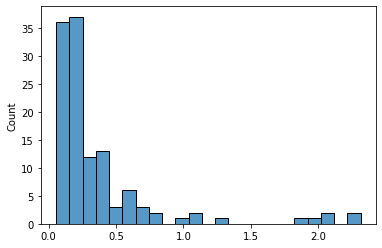

In [11]:
sns.histplot(y)

# Difference G over span of our solar system

In [119]:
AU_to_kpc = 4.8476302883992e-9
pluto_distance = 39.5*AU_to_kpc

In [122]:
# % difference in G from Sun to Pluto, given a slope of say mode above
pluto*0.15

2.87222094587655e-08